In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()
import pandas as pd

In [3]:
pd.__version__

'1.2.4'

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
32*32*3

3072

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
def plot_sample(x, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

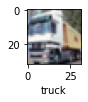

In [13]:
plot_sample(x_train, y_train,1)

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
ann.fit(x_train, y_train, epochs=1)

1563/1563 [==============================] - 63s 40ms/step - loss: 1.8118 - accuracy: 0.3551


In [17]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.7124 - accuracy: 0.3953


[1.7123931646347046, 0.3953000009059906]

In [18]:
y_pred = ann.predict(x_test)
y_classes = [np.argmax(elements) for elements in y_pred]

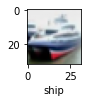

In [19]:
plot_sample(x_test, y_test, 1)

In [20]:
classes[y_classes[1]]

'truck'

In [31]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.6406 - accuracy: 0.3949
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2912 - accuracy: 0.5348
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1609 - accuracy: 0.5869
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0760 - accuracy: 0.6180
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0103 - accuracy: 0.6433
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9601 - accuracy: 0.6621
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9145 - accuracy: 0.6782
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8743 - accuracy: 0.6917
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8451 - accuracy: 0.70250s - loss: 0.846
Epoch 10/10
1563/1563 [=========================

In [36]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9251 - accuracy: 0.6881


[0.9251196384429932, 0.6880999803543091]

In [ ]:
1 : 0.42
2 : 0.66
Softmax
1: .42 / .42+.66
2: .66 / .42+.66